In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Processing data file

In [3]:
seattle_data = pd.read_csv("seattle_incidents_summer_2014.csv",
                           parse_dates=['Date Reported','Occurred Date or Date Range Start','Occurred Date Range End'],
                           infer_datetime_format=True)

In [4]:
seattle_data.columns

Index(['RMS CDW ID', 'General Offense Number', 'Offense Code',
       'Offense Code Extension', 'Offense Type', 'Summary Offense Code',
       'Summarized Offense Description', 'Date Reported',
       'Occurred Date or Date Range Start', 'Occurred Date Range End',
       'Hundred Block Location', 'District/Sector', 'Zone/Beat',
       'Census Tract 2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year'],
      dtype='object')

In [5]:
seattle_data.head(3)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2015-06-28 10:31:00,2014-06-28 10:31:00,2015-06-28 10:31:00,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,2015-06-24 11:09:00,2014-06-01 00:00:00,2015-06-24 11:09:00,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,2015-06-22 09:22:00,2014-08-31 09:00:00,NaT,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014


In [4]:
sf_data = pd.read_csv("sanfrancisco_incidents_summer_2014.csv",
                     parse_dates=['Date','Time'],
                     infer_datetime_format=True)

In [7]:
sf_data.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,2014-08-31,2016-09-16 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,2014-08-31,2016-09-16 23:45:00,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,2016-09-16 23:30:00,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244


In [5]:
seattle_ind = pd.DatetimeIndex(seattle_data['Occurred Date or Date Range Start'])

In [6]:
seattle_data['crime_date'] = seattle_ind.date
seattle_data['crime_hour'] = seattle_ind.hour

In [7]:
# count crimes by date
seattle_by_date_area = seattle_data.pivot_table('RMS CDW ID',index='crime_date',columns='District/Sector',aggfunc='count',fill_value=0)

In [11]:
seattle_by_date_area.head(5)

District/Sector,99,B,C,D,E,F,G,J,K,L,M,N,O,Q,R,S,U,W
crime_date,,,,,,,,,,,,,,,,,,
2014-06-01,2,34,20,21,37,16,15,36,37,23,23,19,6,21,14,23,39,11
2014-06-02,0,36,24,45,16,28,20,31,35,22,13,26,23,13,36,17,14,20
2014-06-03,0,30,19,10,20,20,9,25,34,33,20,25,10,24,27,18,14,18
2014-06-04,0,20,19,19,26,14,16,35,35,27,22,29,20,30,37,11,18,14
2014-06-05,0,23,23,15,21,23,19,31,21,11,18,43,19,21,30,20,21,27


In [8]:
sf_ind_date = pd.DatetimeIndex(sf_data['Date'])
sf_ind_time = pd.DatetimeIndex(sf_data['Time'])
sf_data['crime_date'] = sf_ind_date.date
sf_data['crime_hour'] = sf_ind_time.hour
sf_by_date_area = sf_data.pivot_table('IncidntNum',index='crime_date',columns='PdDistrict',aggfunc='count',fill_value=0)

In [13]:
sf_by_date_area.head(5)

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
crime_date,,,,,,,,,,
2014-06-01,19,38,27,49,30,17,16,56,5,27
2014-06-02,34,23,22,37,42,12,14,72,13,27
2014-06-03,31,25,19,46,43,11,19,55,13,32
2014-06-04,43,39,26,63,53,21,19,59,23,34
2014-06-05,27,46,32,50,35,29,5,63,19,13


# Analyzing data

## Crime Rate by Time in a day
Crimes in Sanfrancisco mostly happen around evening, with 'Southern' area being the worst. On the other hand, in seattle, crimes happen more and more as the day process. In the midnight around 12 am crime incidence peaks, indicating it being more dangerous for late night at seattle. In Seattle, crime incidences are more evenly distributed acrros the city.

In [9]:
seattle_by_time_area = seattle_data.pivot_table('RMS CDW ID',index='crime_hour',columns='District/Sector',aggfunc='count',fill_value=0)

In [10]:
sf_by_time_area = sf_data.pivot_table('IncidntNum',index='crime_hour',columns='PdDistrict',aggfunc='count',fill_value=0)

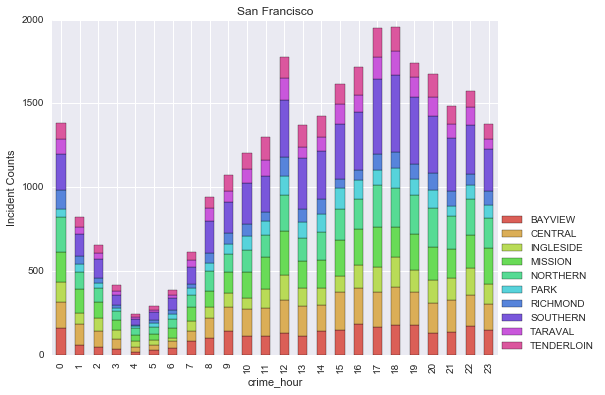

In [43]:
sns.set_palette('hls',n_colors=len(sf_by_time_area.columns.tolist()))
sf_by_time_area.plot.bar(stacked=True,figsize=(8,6))
plt.legend(loc=(1,0))
plt.ylabel('Incident Counts')
plt.title("San Francisco")
sns.plt.show()
# need to adjust color and caption

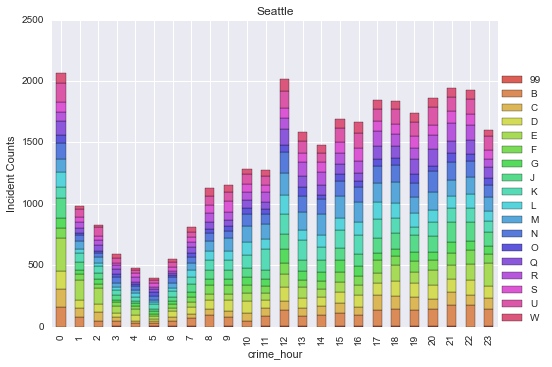

In [44]:
sns.set_palette('hls',n_colors=len(seattle_by_time_area.columns.tolist()))
seattle_by_time_area.plot.bar(stacked=True)
plt.legend(loc=(1,0))
plt.ylabel('Incident Counts')
plt.title("Seattle")
sns.plt.show()

## Crime Geographic Distribution

In [18]:
seattle_by_area = seattle_data.pivot_table('RMS CDW ID',index='District/Sector',aggfunc='count',fill_value=0)

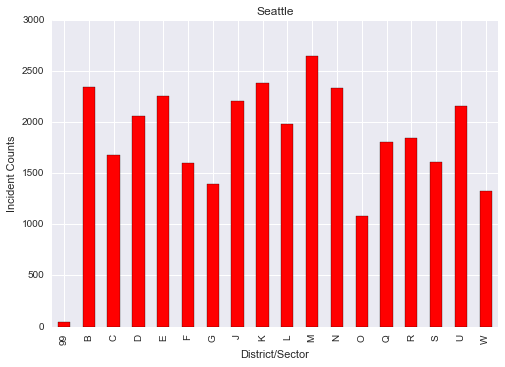

In [45]:
seattle_by_area.plot(kind="bar",color='red')
plt.ylabel('Incident Counts')
plt.title('Seattle')
plt.show()

In [26]:
sf_by_area = sf_data.pivot_table('IncidntNum',index='PdDistrict',aggfunc='count',fill_value=0)
sf_by_area_df = pd.DataFrame(sf_by_area)
sf_by_area_df.sort(['IncidntNum'],inplace=True,ascending=False)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


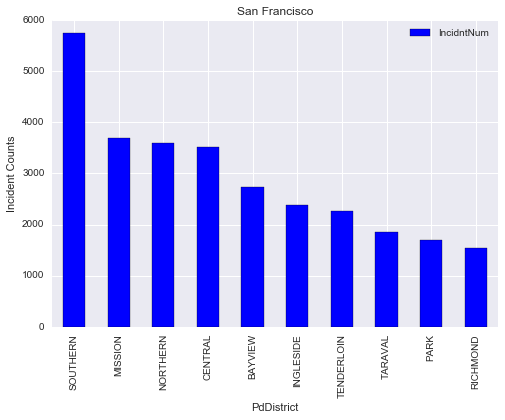

In [27]:
sf_by_area_df.plot(kind="bar",color='blue')
plt.ylabel('Incident Counts')
plt.title('San Francisco')
plt.show()

# Crime Rate by Category
+  In Seattle, the most frequent crime incident is 'Car Prowl'. 'Vehicle theft' and 'Burglary' are also sevious problems.
+  However in San Francsico, 'Larcency/theft' happens way more often then any other crimes.

### Seattle

In [22]:
seattle_by_category = seattle_data.pivot_table('RMS CDW ID',
                                               index='Summarized Offense Description',
                                               aggfunc='count',fill_value=0)

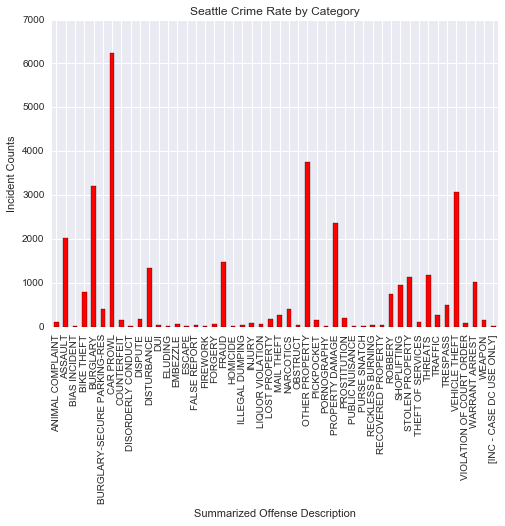

In [23]:
seattle_by_category.plot(kind='bar',color='r')
plt.title('Seattle Crime Rate by Category')
plt.ylabel('Incident Counts')
plt.grid(True)
sns.plt.show()

### San Francisco

In [24]:
sf_by_category = sf_data.pivot_table('IncidntNum',index='Category',aggfunc='count',fill_value=0)

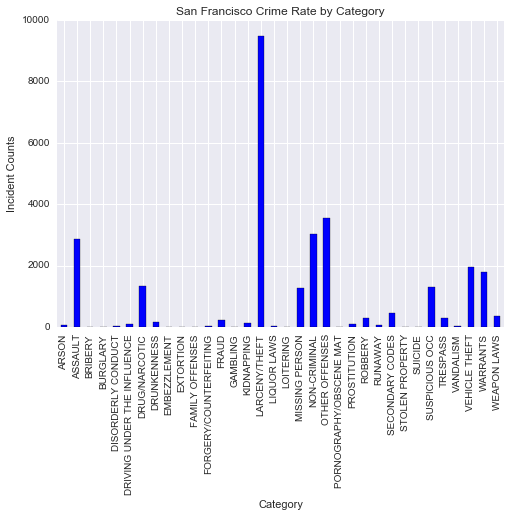

In [25]:
sf_by_category.plot(kind='bar',color='b')
plt.title('San Francisco Crime Rate by Category')
plt.grid(True)
plt.ylabel('Incident Counts')
sns.plt.show()

## Crime Category Distribution Within a Day
+  In Seattle, car prowl happen mostly during midnight. This is also true for vehicle theft.
+  In San Francisco, larcency or theft occur around evening. At noon time there is a slight increase of incidence for theft and other crimes, however theft is the highest possible crime for San Francisco during evening.

### Seattle

In [26]:
sub_seattle = seattle_data.pivot_table('RMS CDW ID',
                                       index='crime_hour',
                                       columns=['Summarized Offense Description'],
                                       aggfunc='count',fill_value=0)

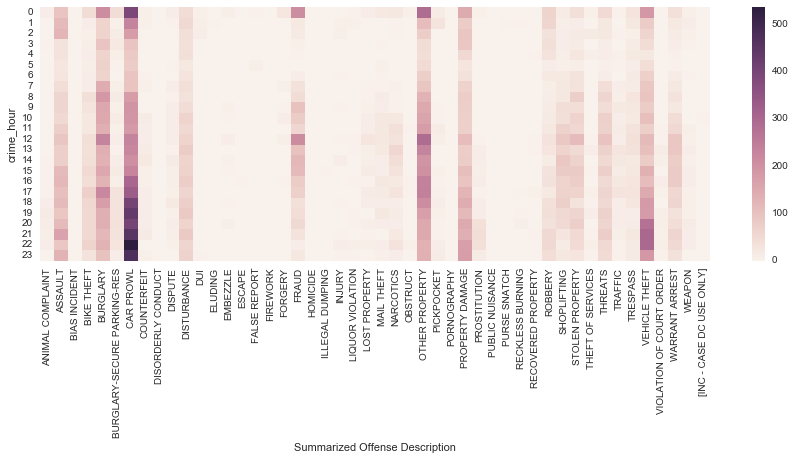

In [27]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax = sns.heatmap(sub_seattle)
sns.plt.show()

### San Francisco

In [28]:
sub_sf = sf_data.pivot_table('IncidntNum',
                                       index='crime_hour',
                                       columns=['Category'],
                                       aggfunc='count',fill_value=0)

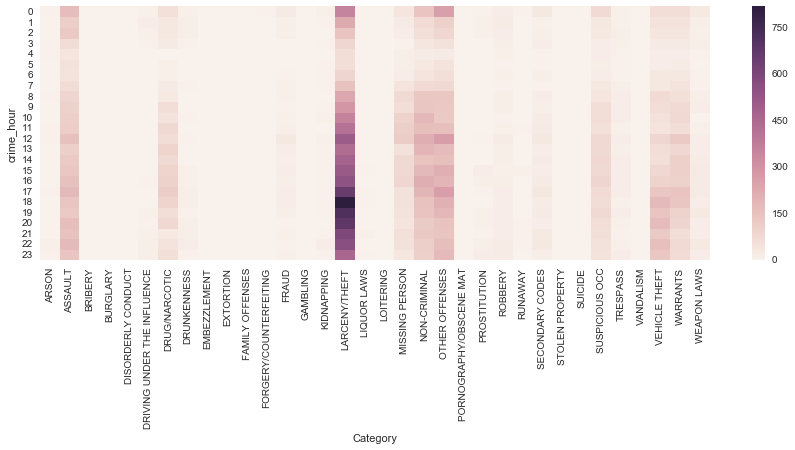

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax = sns.heatmap(sub_sf)
sns.plt.show()

## Crime category distribution accross the city
+  In Seattle, the worst place to park a car during evening is District/Sector M. Sector D is also not a very good idea. A better place would be one of Sector F, O, S, or W.
+  In San Francisco, one should not carry large amount of cash wandering around Southern, Northern, or Central. Although Mission District is of lower risk than the above for theft, one should be alerted because of its similar rate for assult in comparison with Southern area.

### Seattle

In [30]:
sub_seattle_geo = seattle_data.pivot_table('RMS CDW ID',
                                           index='District/Sector',
                                           columns=['Summarized Offense Description'],
                                           aggfunc='count',fill_value=0)

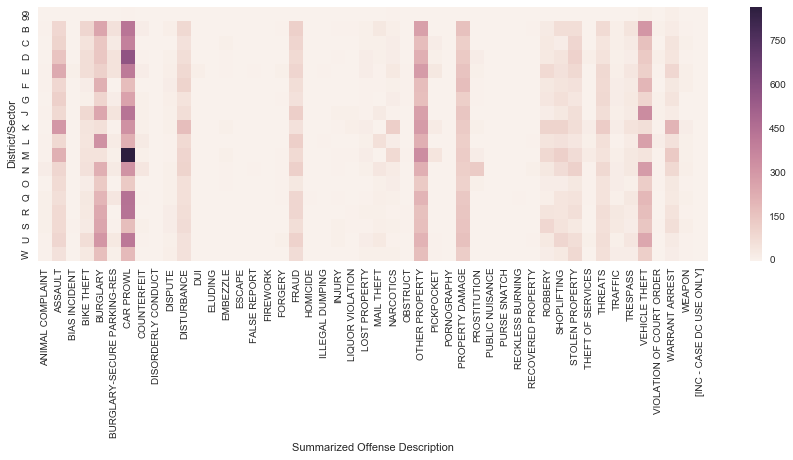

In [36]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax = sns.heatmap(sub_seattle_geo)
sns.plt.show()

### San Francisco

In [41]:
sub_sf_geo = sf_data.pivot_table('IncidntNum',
                             index='PdDistrict',
                             columns=['Category'],
                             aggfunc='count',fill_value=0)

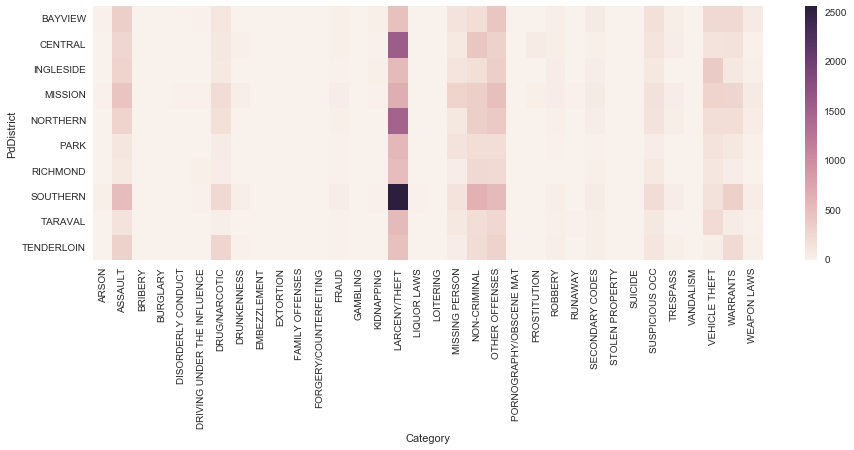

In [42]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax = sns.heatmap(sub_sf_geo)
sns.plt.show()

## Crime Rate by Date
Crimes happen quite random from June to August

In [31]:
seattle_by_date_area["total"] = seattle_by_date_area.sum(axis=1)
seattle_by_date_area.shape[-1]

19

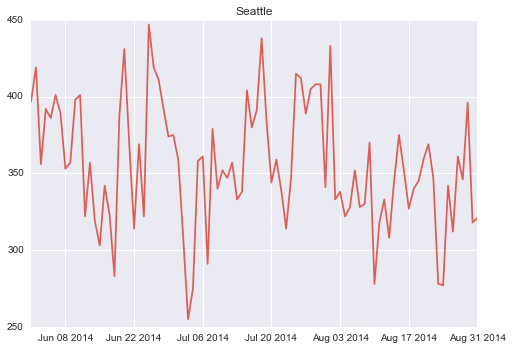

In [47]:
plt.plot(seattle_by_date_area.loc[:,'total'])
plt.title("Seattle")
sns.plt.show()

In [33]:
sf_by_date_area['total'] = sf_by_date_area.sum(axis=1)

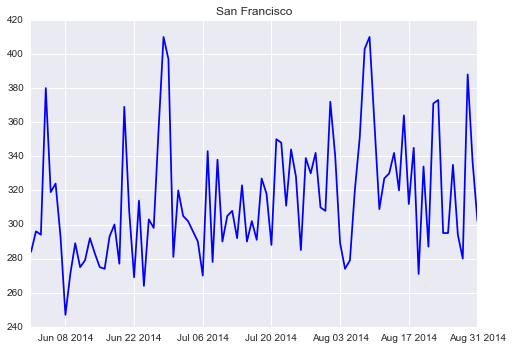

In [49]:
plt.plot(sf_by_date_area.loc[:,'total'],color='b')
plt.title("San Francisco")
sns.plt.show()